In [1]:
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [3]:
import os

load_dir = "/gorbsky_data/input_data/clean/"
store_dir = "/gorbsky_data/binary_data/stardist/"
files = [f for f in os.listdir(load_dir) if f.endswith(".tif")]

In [4]:
from stardist.models import StarDist2D 


model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


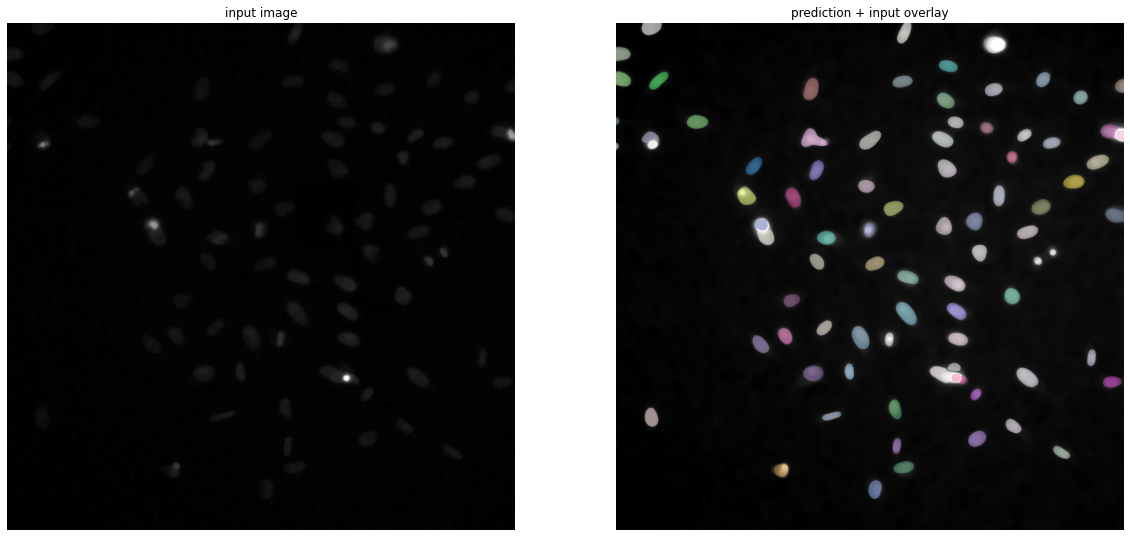

In [39]:
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow
from stardist.plot import render_label

from csbdeep.utils import normalize
from skimage.morphology import opening, closing, disk
from skimage.filters import median
from skimage.exposure import equalize_adapthist

selem = disk(18)
img = imread(load_dir+files[0])[288]
img1 = normalize(median(img,selem))

labels, _ = model.predict_instances(img1)

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.imshow(equalize_adapthist(img), cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img1))
plt.axis("off")
plt.title("prediction + input overlay")

plt.show()

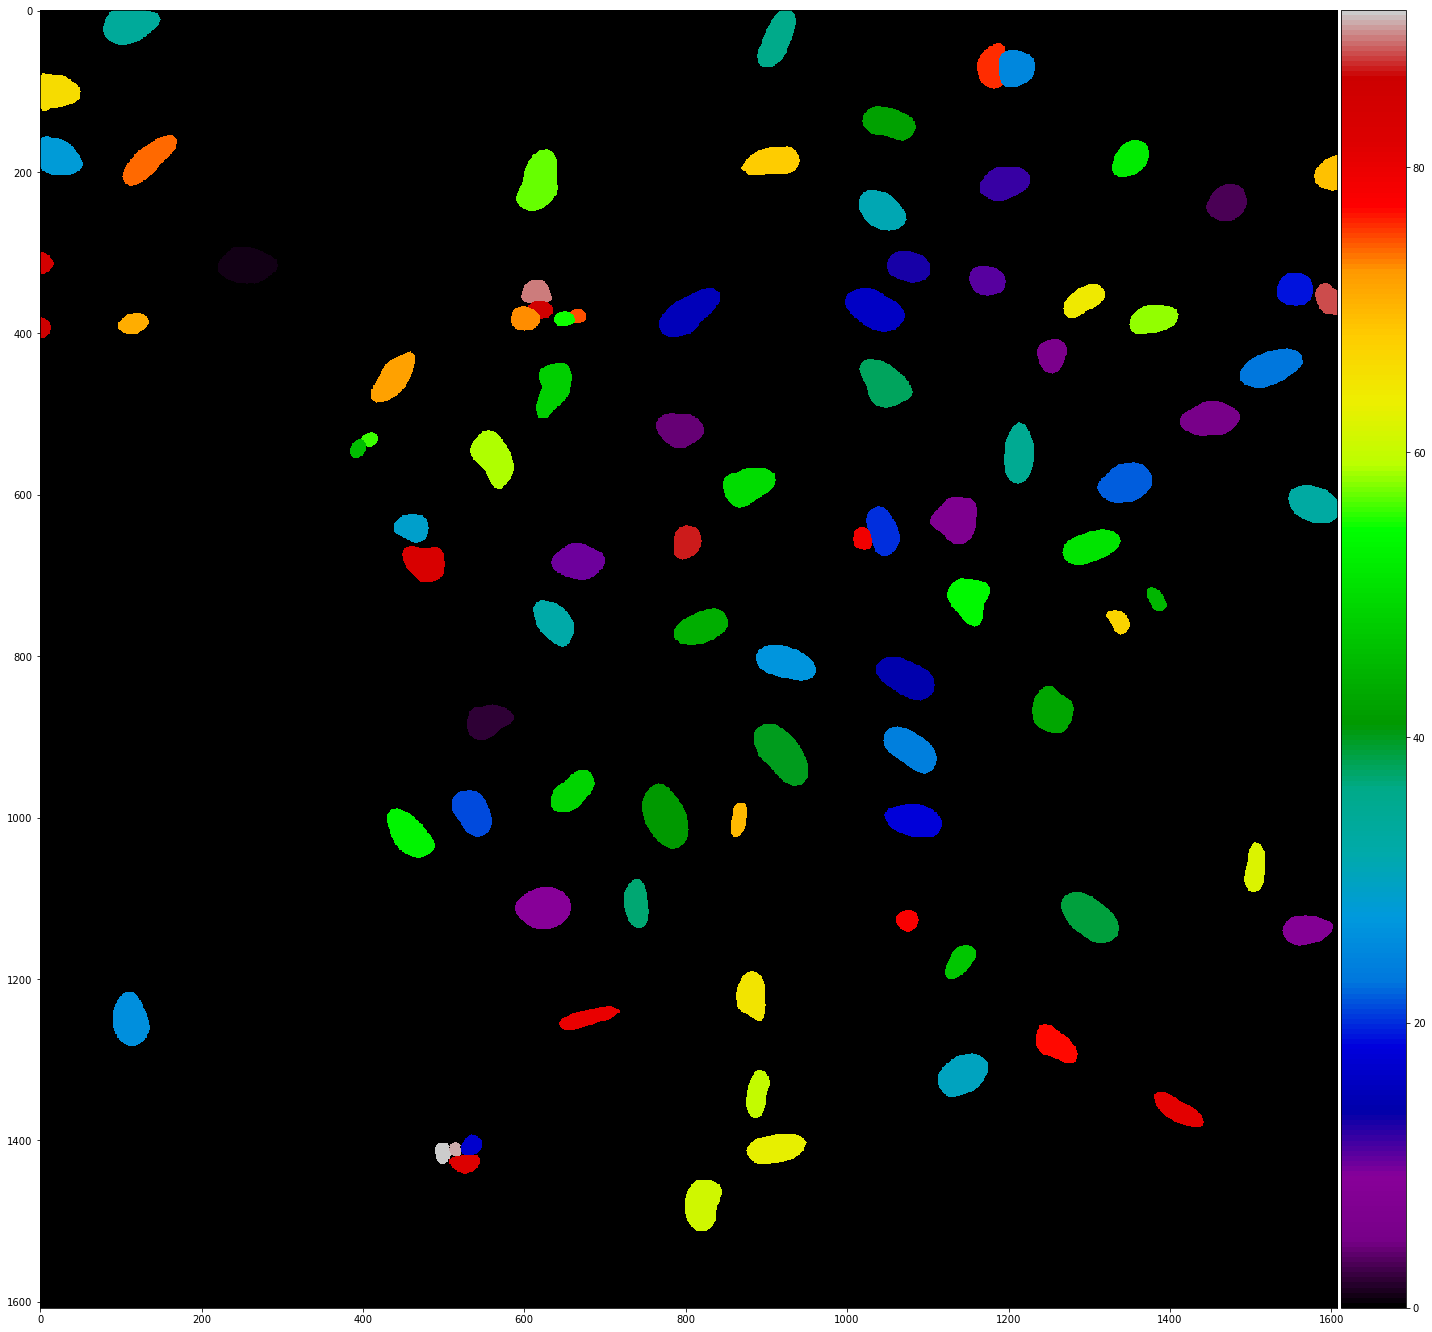

In [8]:
plt.figure(figsize=(20,20))

imshow(labels,cmap="nipy_spectral")

plt.show()

In [40]:
from tqdm.notebook import tqdm
import numpy as np

selem = disk(18)

count = 0
for f in files:
    count +=1
    imgs = imread(load_dir+f)
    new_imgs = np.empty_like(imgs)
    for i in tqdm(range(imgs.shape[0])):
        img = imgs[i]
        img = normalize(median(img,selem))
        lbl, _ = model.predict_instances(img)
        new_imgs[i] = lbl
    imsave(store_dir+"no_morph/"+f, new_imgs)
    print("{} out of {} files binarized and saved".format(count, len(files)))

  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W1P 1c1.tif is a low contrast image


1 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W1P 2c1.tif is a low contrast image


2 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W1P 3c1.tif is a low contrast image


3 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W1P 4c1.tif is a low contrast image


4 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W2 P 5c1.tif is a low contrast image


5 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W2 P 6c1.tif is a low contrast image


6 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W2 P 7c1.tif is a low contrast image


7 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W2 P 8c1.tif is a low contrast image


8 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W7 P 25c1.tif is a low contrast image


9 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W7 P 26c1.tif is a low contrast image


10 out of 11 files binarized and saved


  0%|          | 0/289 [00:00<?, ?it/s]

<ipython-input-40-a5325c831b8e> (16): /gorbsky_data/binary_data/stardist/no_morph/jd734W7 P 27c1.tif is a low contrast image


11 out of 11 files binarized and saved


In [14]:
imgs = imread(store_dir+files[0])
imgs.shape

(289, 1608, 1608)